## We have E-bay's auction data and we want to get the optimize the parameters for "Win"

Objective: To find the values of independent variables for which the probability of an auction win is maximum

In [1]:
# Getting the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [2]:
# Get the current working directory
current_dir = os.getcwd()

# Define the relative path to the dataset file
dataset_path = os.path.join(current_dir, '10.10.2022.xlsx')
df=pd.read_excel(dataset_path)
df.head(10)

,Status,Close Date,Closer Time,Avg Buy ($),Avg Sell ($),Packet Size,Side,Return ($),Return %,eBay Commission ($),...,Hold Time Bucket,Ticks,Net of TC ($),Close Time Bucket,Open Time Bucket,Net of TC per Packet ($),Unique Dates,Win Day?,Consecutive reps,Consecutive wins
0,WIN,2022-10-10,09:16:57,357.75,364.0,100.0,CE,625.00,0.017470,108.0,...,00:00:00,6.25,517.00,09:00:00,09:00:00,129.25,2022-10-10,1.0,1.0,1.0
1,WIN,2022-10-10,09:19:28,335.35,342.3,25.0,CE,173.75,0.020725,64.0,...,00:00:00,6.95,109.75,09:00:00,09:00:00,109.75,2022-10-11,0.0,1.0,2.0
2,WIN,2022-10-10,09:22:16,334.90,350.0,25.0,CE,377.50,0.045088,64.0,...,00:00:00,15.10,313.50,09:00:00,09:00:00,313.50,2022-10-12,1.0,1.0,3.0
3,WIN,2022-10-10,09:20:37,316.40,323.0,25.0,CE,165.00,0.020860,64.0,...,00:00:00,6.60,101.00,09:00:00,09:00:00,101.00,2022-10-13,1.0,2.0,4.0
4,WIN,2022-10-10,09:21:31,311.35,317.0,25.0,CE,141.25,0.018147,64.0,...,00:00:00,5.65,77.25,09:00:00,09:00:00,77.25,2022-10-14,1.0,3.0,5.0
5,WIN,2022-10-10,09:26:12,371.20,384.5,25.0,CE,332.50,0.035830,64.0,...,00:00:00,13.30,268.50,09:00:00,09:00:00,268.50,2022-10-17,1.0,4.0,6.0
6,WIN,2022-10-10,09:37:08,391.20,396.0,25.0,CE,120.00,0.012270,64.0,...,00:00:00,4.80,56.00,09:00:00,09:00:00,56.00,2022-10-18,0.0,1.0,7.0
7,WIN,2022-10-10,09:36:26,381.50,385.3,25.0,CE,95.00,0.009961,64.0,...,00:00:00,3.80,31.00,09:00:00,09:00:00,31.00,2022-10-19,0.0,2.0,8.0
8,WIN,2022-10-10,09:36:42,366.60,388.1,25.0,CE,537.50,0.058647,64.0,...,00:00:00,21.50,473.50,09:00:00,09:00:00,473.50,2022-10-20,1.0,1.0,9.0
9,WIN,2022-10-10,09:36:26,373.25,385.3,25.0,CE,301.25,0.032284,64.0,...,00:00:00,12.05,237.25,09:00:00,09:00:00,237.25,2022-10-21,0.0,1.0,10.0


In [3]:
# dropping all the derived/dependent variables
df.drop(["Unique Dates","Win Day?","Consecutive reps",'Consecutive wins',"Close Date","Closer Time","Auction Open Date","Auction #","Return %","Auction Open Time","Net of TC per Packet ($)",'Avg Buy ($)', 'Avg Sell ($)', 'Return ($)', 'eBay Commission ($)','Ticks', 'Net of TC ($)','Close Time Bucket', 'Hold Time', 'Open Time Bucket'], axis=1, inplace=True)
df.head()

,Status,Packet Size,Side,Channel,Hold Time Bucket
0,WIN,100.0,CE,Z,00:00:00
1,WIN,25.0,CE,Z,00:00:00
2,WIN,25.0,CE,Z,00:00:00
3,WIN,25.0,CE,Z,00:00:00
4,WIN,25.0,CE,Z,00:00:00


In [4]:
print(df.shape)

(3265, 5)


In [5]:
# Convert 'WIN' and 'LOSS' in the 'Status' column to 1 and 0 (encoding)
df['Status'] = df['Status'].map({'WIN': 1, 'LOSS': 0})

In [7]:
# Perform one-hot encoding on the categorical columns
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Side', 'Channel', 'Hold Time Bucket']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names(categorical_cols)

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_cols], axis=1)

In [8]:
# checking for nulls
df_encoded.isnull().sum()

Status                       0
Packet Size                  0
Side_CE                      0
Side_PE                      0
Channel_K                    0
                            ..
Hold Time Bucket_04:55:00    0
Hold Time Bucket_05:25:00    0
Hold Time Bucket_05:27:30    0
Hold Time Bucket_05:45:00    0
Hold Time Bucket_05:47:30    0
Length: 69, dtype: int64

In [9]:
# checking the data
df_encoded.nunique()

Status                        2
Packet Size                  15
Side_CE                       2
Side_PE                       2
Channel_K                     2
                             ..
Hold Time Bucket_04:55:00     2
Hold Time Bucket_05:25:00     2
Hold Time Bucket_05:27:30     2
Hold Time Bucket_05:45:00     2
Hold Time Bucket_05:47:30     2
Length: 69, dtype: int64

### EDA

In [10]:
df_win=df_encoded.loc[df["Status"]=="WIN"]
df_loss=df_encoded.loc[df["Status"]=="LOSS"]

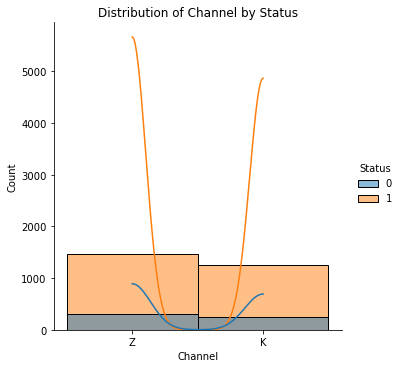

In [11]:
# Plot distribution plot
sns.displot(data=df, x='Channel', hue='Status', kde=True)

# Add labels and title
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Distribution of Channel by Status')

# Show the plot
plt.show()

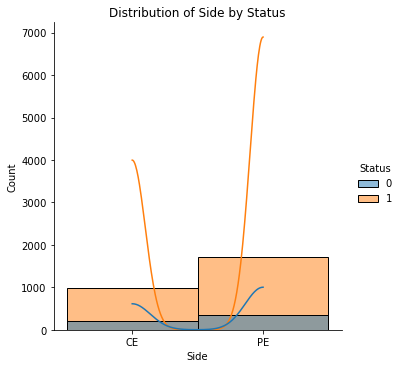

In [12]:

sns.displot(data=df, x='Side', hue='Status', kde=True)

# Add labels and title
plt.xlabel('Side')
plt.ylabel('Count')
plt.title('Distribution of Side by Status')

# Show the plot
plt.show()

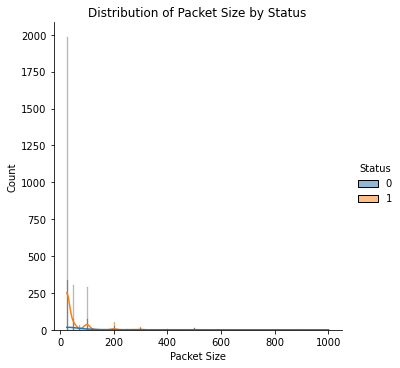

In [13]:
# Plot distribution plot
sns.displot(data=df, x='Packet Size', hue='Status', kde=True)

# Add labels and title
plt.xlabel('Packet Size')
plt.ylabel('Count')
plt.title('Distribution of Packet Size by Status')

# Show the plot
plt.show()

# Model Fitting - Extreme Gradient Boost

In [14]:
x= df_encoded.drop('Status', axis=1)
y=df_encoded["Status"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the testing set
predictions = classifier.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Calculate precision
precision = precision_score(y_test, predictions)

# Calculate recall
recall = recall_score(y_test, predictions)

# Calculate F1 score
f1 = f1_score(y_test, predictions)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Accuracy:", accuracy)

Precision: 0.9005145797598628
Recall: 0.9341637010676157
F1 Score: 0.9170305676855897
ROC-AUC Score: 0.6484005318524892
Accuracy: 0.8545176110260337


## Checking the model

In [18]:
import numpy as np

# Create a sample data point with different combinations of values
sample_data = pd.DataFrame({'Packet Size': [15, 20, 25],
                            'Side': ['CE', 'PE', 'CE'],
                            'Channel': ['J', 'K', 'K'],
                            'Hold Time Bucket': ['00:00:00', '00:02:30', '00:05:00']})

# Perform one-hot encoding on the categorical columns
encoded_sample_data = pd.DataFrame(encoder.transform(sample_data[categorical_cols]))
encoded_sample_data.columns = encoder.get_feature_names(categorical_cols)

# Concatenate the encoded sample data with the original DataFrame
sample_data_encoded = pd.concat([sample_data.drop(categorical_cols, axis=1), encoded_sample_data], axis=1)

# Make predictions on the sample data
predictions = classifier.predict_proba(sample_data_encoded)[:, 1]  # Probabilities of WIN (class 1)

# Add the probabilities to the sample data
sample_data['Win Probability'] = np.round(predictions, 2)

# Sort the data by win probability in descending order
sample_data_sorted = sample_data.sort_values(by='Win Probability', ascending=False)

# Print the sorted data
print(sample_data_sorted)


   Packet Size Side Channel Hold Time Bucket  Win Probability
1           20   PE       K         00:02:30             0.54
0           15   CE       J         00:00:00             0.52
2           25   CE       K         00:05:00             0.51


## Results

In [19]:
# Make predictions on the data to get win probabilities
win_probabilities = classifier.predict_proba(x)[:, 1]

# Add the win probabilities to the dataframe
df['Win Probability'] = win_probabilities

# Group the data by the categorical variables and calculate the average win probability
win_probabilities = df.groupby(['Side', 'Channel', 'Hold Time Bucket', 'Packet Size'])['Win Probability'].mean()

# Sort the win probabilities in descending order
win_probabilities = win_probabilities.sort_values(ascending=False)

# Print the combinations with the highest win probabilities
print(win_probabilities)

Side  Channel  Hold Time Bucket  Packet Size
CE    Z        00:00:00          250.0          0.992988
PE    Z        00:00:00          250.0          0.985708
CE    Z        00:00:00          200.0          0.982320
PE    Z        00:00:00          75.0           0.982064
CE    Z        00:00:00          75.0           0.981490
                                                  ...   
PE    Z        01:05:00          900.0          0.031597
               00:05:00          500.0          0.025685
               00:07:30          500.0          0.020525
      K        00:27:30          125.0          0.008783
               00:47:30          125.0          0.008255
Name: Win Probability, Length: 349, dtype: float32
